<a href="https://colab.research.google.com/github/andreac941/ComputerVision-Eq3/blob/main/0_ENTREGABLES/5.3_AlgorDominioFourier_Eq10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 5.3 Google Colab algoritmos de mejoramiento de imágenes en el dominio de Fourier
### Equipo 10:

##### Carlos Roberto Torres Ferguson - A01215432 
##### Andrea Carolina Treviño Garza - A01034993 
##### Julio Adrián Quintana Gracia - A01793661 
##### Pablo Alejandro Colunga Vázquez  - A01793671



**Importando las librerías requeridas:**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt,exp

<b>Definicion de funciones<b>:

In [2]:
def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def idealFilterLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 1
    return base

def idealFilterHP(D0,imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 0
    return base

def butterworthLP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

def butterworthHP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1-1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

def gaussianLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

1) Investigar una aplicación de mejoramiento de imágenes usando transformada de Fourier usando <b>filtro pasabajas</b>. Realizar una demo sencilla en Google collab. De preferencia probar los tres tipo de filtros básicos (Ideal, el Butterworth y el Gaussian,)

 <b> 1.1 Filtro básico Ideal LP </b>

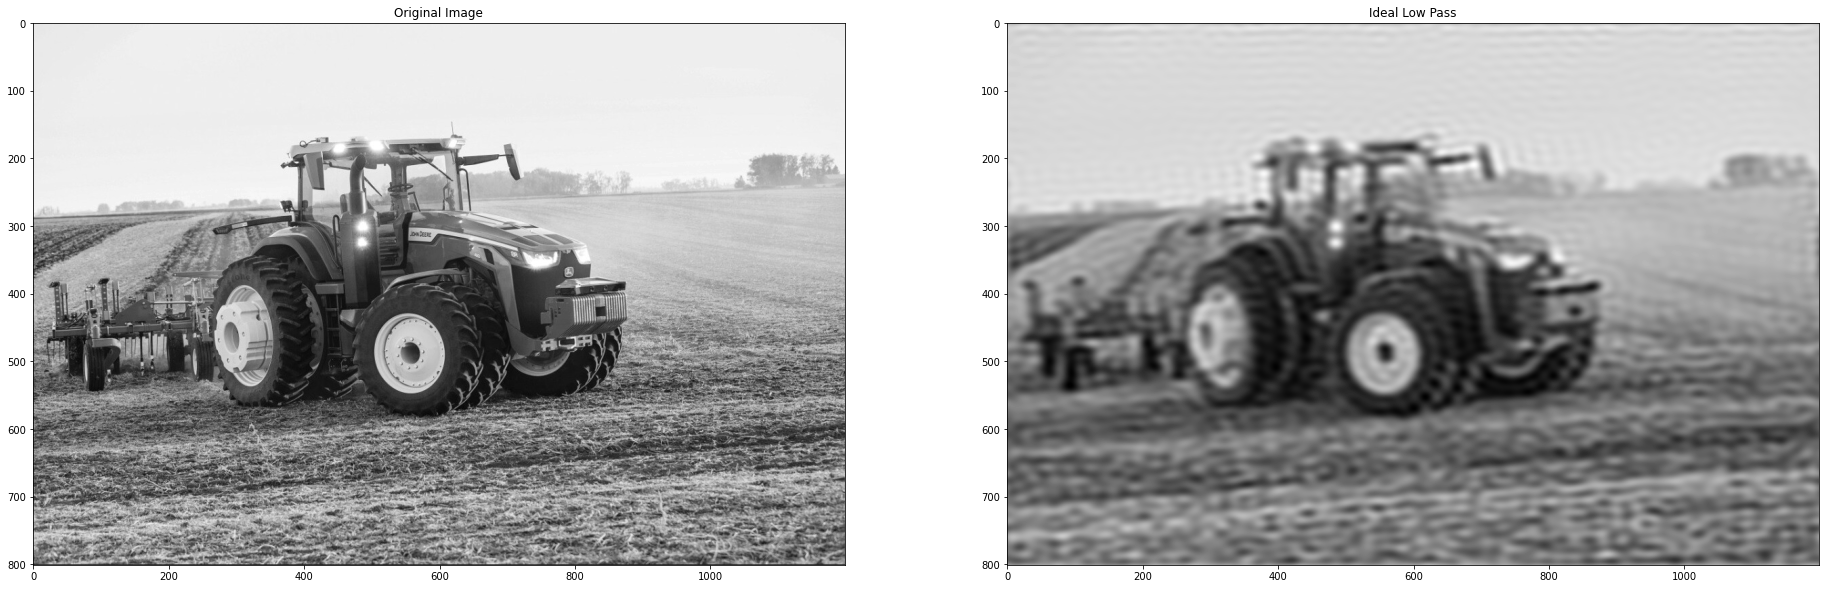

In [19]:
img = cv2.imread("/content/image.jpg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
plt.subplot(121), plt.imshow(img, "gray"), plt.title("Original Image")

LowPassCenter = center * idealFilterLP(50,img.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPassI = np.fft.ifft2(LowPass)
plt.subplot(122), plt.imshow(np.abs(inverse_LowPassI), "gray"), plt.title("Ideal Low Pass")
plt.show()

<b> 1.2 Filtro básico Butterworth LP </b>

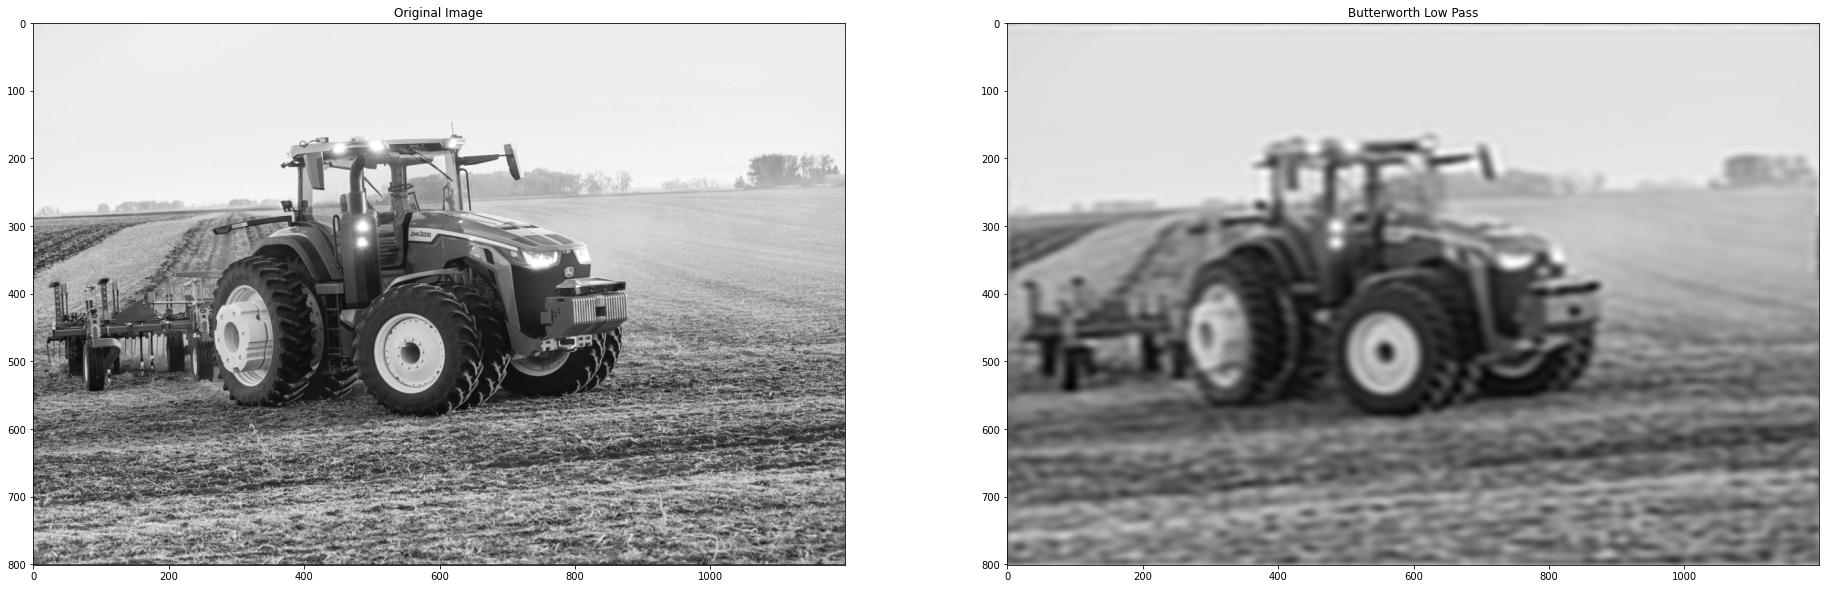

In [20]:
img = cv2.imread("/content/image.jpg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
plt.subplot(121), plt.imshow(img, "gray"), plt.title("Original Image")

LowPassCenter = center * butterworthLP(50,img.shape,5)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPassB = np.fft.ifft2(LowPass)
plt.subplot(122), plt.imshow(np.abs(inverse_LowPassB), "gray"), plt.title("Butterworth Low Pass")
plt.show()

<b> 1.3 Filtro básico Gaussian LP </b>

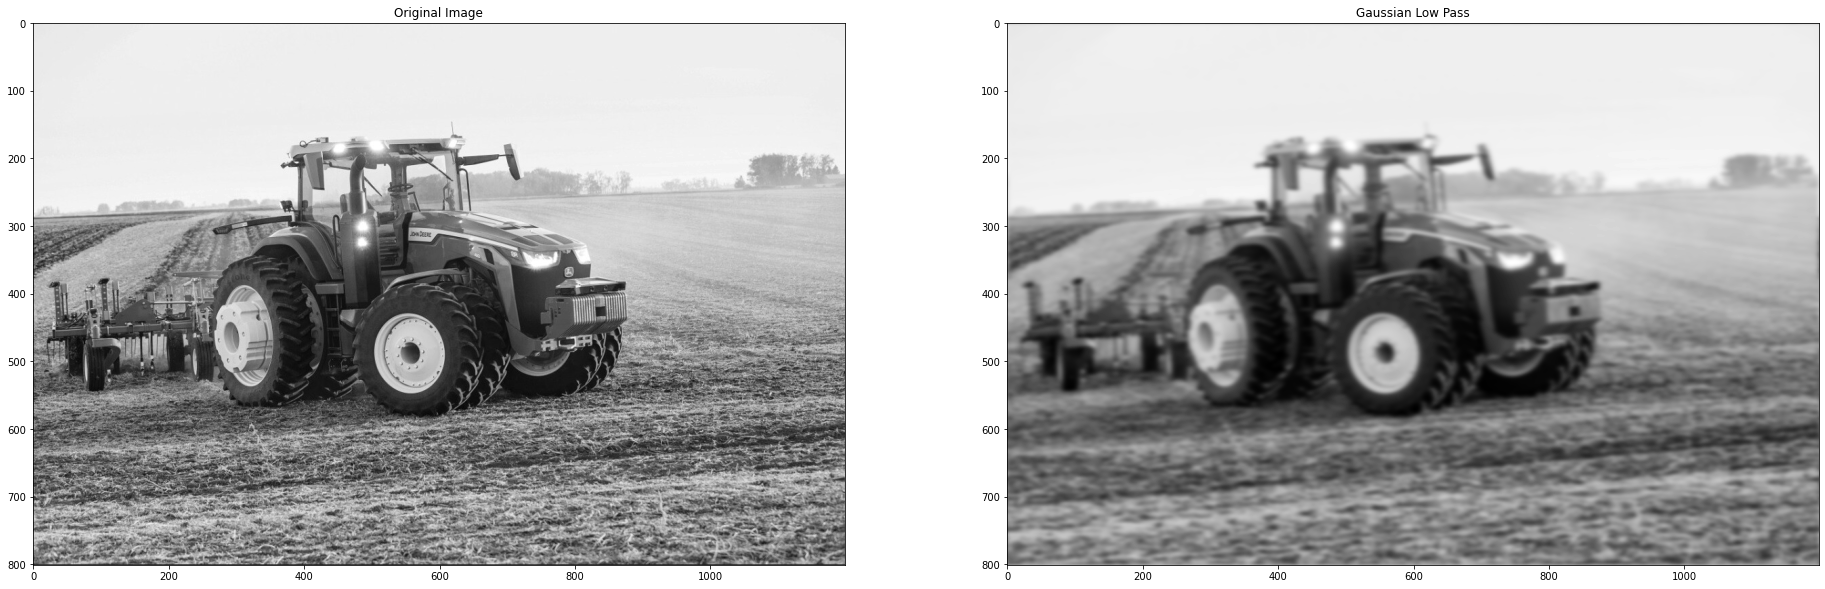

In [23]:
img = cv2.imread("/content/image.jpg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
plt.subplot(121), plt.imshow(img, "gray"), plt.title("Original Image")

LowPassCenter = center * gaussianLP(50,img.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPassG = np.fft.ifft2(LowPass)
plt.subplot(122), plt.imshow(np.abs(inverse_LowPassG), "gray"), plt.title("Gaussian Low Pass")
plt.show()

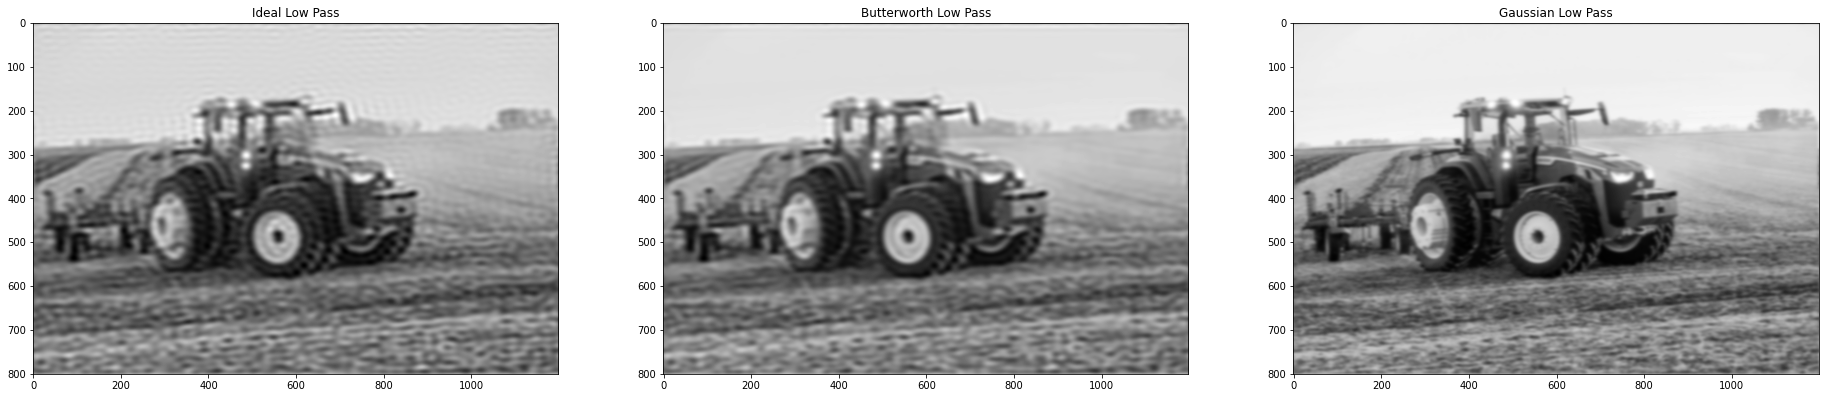

In [22]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
plt.subplot(131), plt.imshow(np.abs(inverse_LowPassI), "gray"), plt.title("Ideal Low Pass")
plt.subplot(132), plt.imshow(np.abs(inverse_LowPassB), "gray"), plt.title("Butterworth Low Pass")
plt.subplot(133), plt.imshow(np.abs(inverse_LowPassG), "gray"), plt.title("Gaussian Low Pass")
plt.show()

#### Discusión y comentarios finales:
* La transformada de fourier nos permite realizar un análisis espectral de una imagen. Este tipo de procesamiento de imágenes nos lleva al espacio de frecuencias, para obtener información de los componentes predominantes, por otra lado a través de la aplicación de varios tipos de filtros podemos aplicar el enfoque deseado para nuestro análisis.
* En el ejemplo anterior aplicamos 3 filtros básicos (Ideal, Gaussian y Butterworth) para la imagen de un tractor en el campo.
* Mediante estos filtros en combinacion con el fitro pasabajas (remueve el ruido de alta frecuencia de una imagen y mantiene el de baja frecuencia)  establecemos enfoque en los puntos predominantes al centro, es decir la imagen procesada muestra los bordes difuminados.
* Como podemos observar en los efectos sobre la imagen del tractor de cada filtro y en la siguiente tabla comparativa:
  * En el **filtro de pasa bajos Ideal** le afecta claramente el "ringing effect", que se visualiza claramente como un ondas de "ruido" en las secciones de color uniforme de la imagen.
  * En el **filtro de pasa bajos de Butterworth** se percibe que también le afecta el "ringin effect", pero en menor medida con el filtro ideal. Efecto que aumenta conforme se incrementa el orden de la función.
  * Mientra que en el **filtro de pasa bajos Gaussiano** se observa que se elimina completamente el "ringing effect" y por lo tanto la imagen tinee un suavizado más uniforme.
* Finalmente se incluye este cuadro comparativo entre los 3 filtros para visualizar claramente cómo se ve su función de transferencia, cada filtro y su representación matemática:

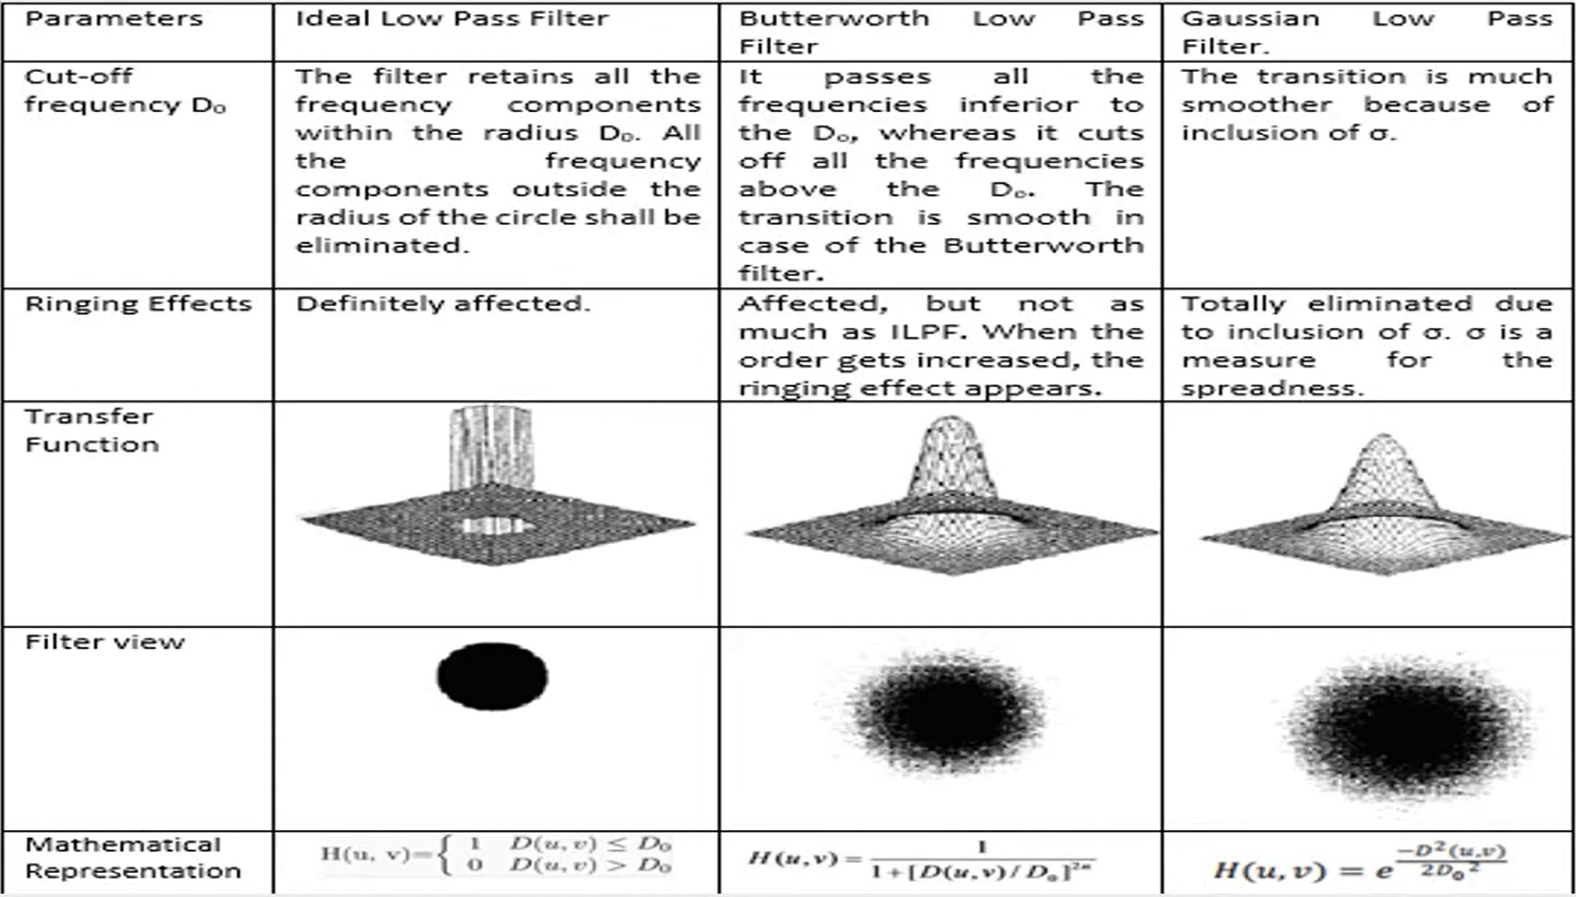

* Fuente: [Video comparativo de los Filtros de pasabajos Ideal, Butterworth y Gaussiano](https://www.youtube.com/watch?v=MIDnZpKu8D8)

2) Investigar una aplicación de mejoramiento de imágenes usando transformada de Fourier usando <b>filtro pasa altas</b>. Realizar una demo sencilla en Google collab. De preferencia probar los tres tipo de filtros básicos

 <b> 2.1 Filtro básico Ideal HP </b>

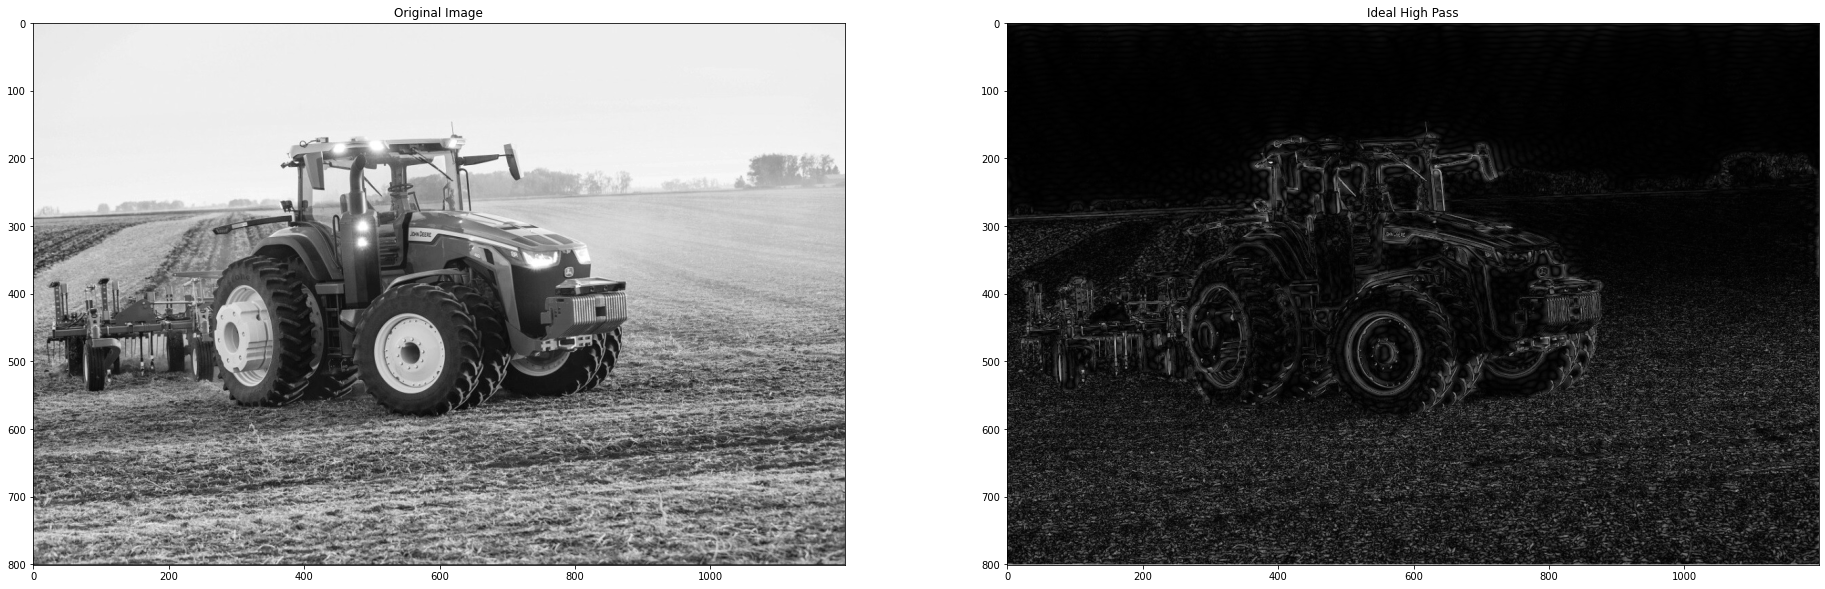

In [29]:
img = cv2.imread("/content/image.jpg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
plt.subplot(121), plt.imshow(img, "gray"), plt.title("Original Image")

HighPassCenter = center * idealFilterHP(50,img.shape)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPassI = np.fft.ifft2(HighPass)
plt.subplot(122), plt.imshow(np.abs(inverse_HighPassI), "gray"), plt.title("Ideal High Pass")
plt.show()

<b> 2.2 Filtro básico Butterworth HP </b>

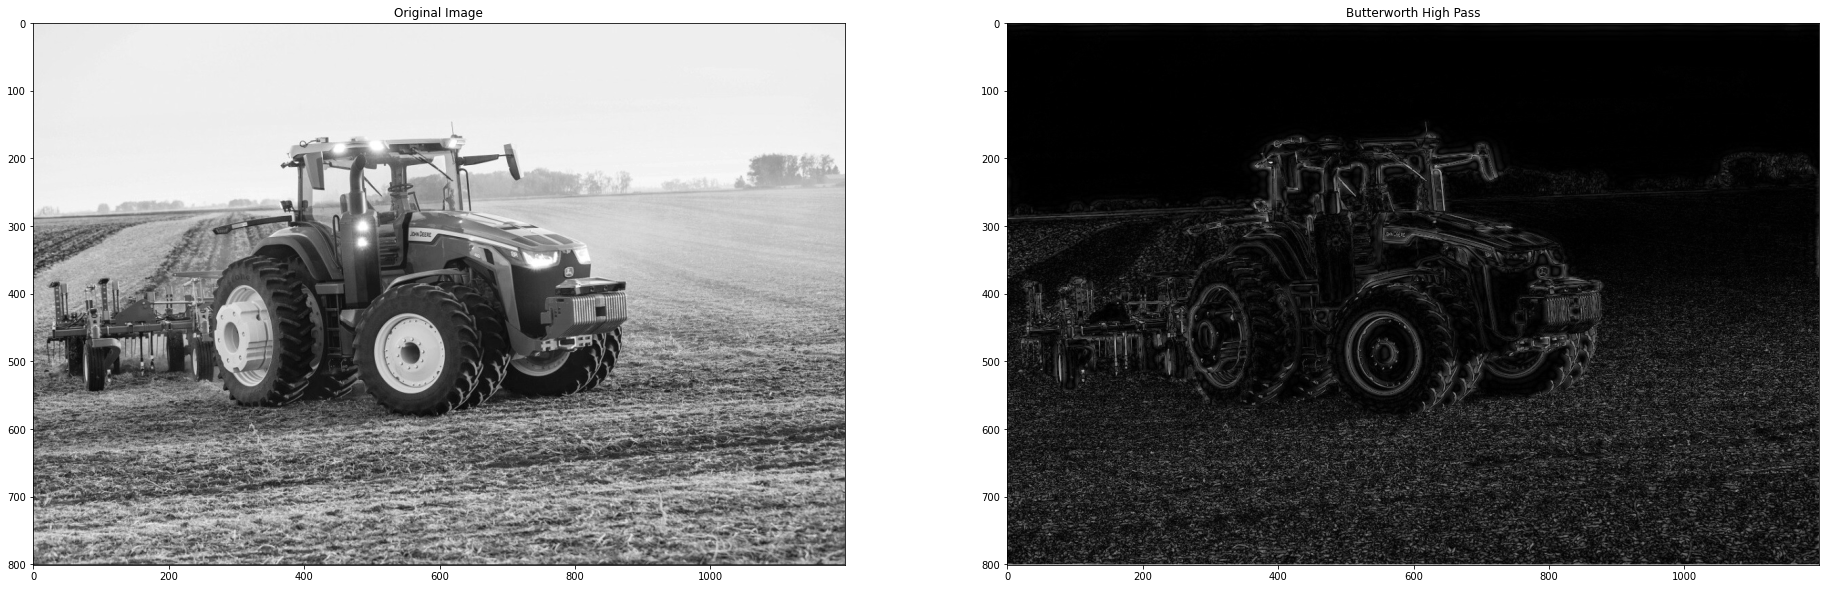

In [30]:
img = cv2.imread("/content/image.jpg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
plt.subplot(121), plt.imshow(img, "gray"), plt.title("Original Image")

HighPassCenter = center * butterworthHP(50,img.shape,5)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPassB = np.fft.ifft2(HighPass)
plt.subplot(122), plt.imshow(np.abs(inverse_HighPassB), "gray"), plt.title("Butterworth High Pass")
plt.show()

<b> 2.3 Filtro básico Gaussiano HP </b>

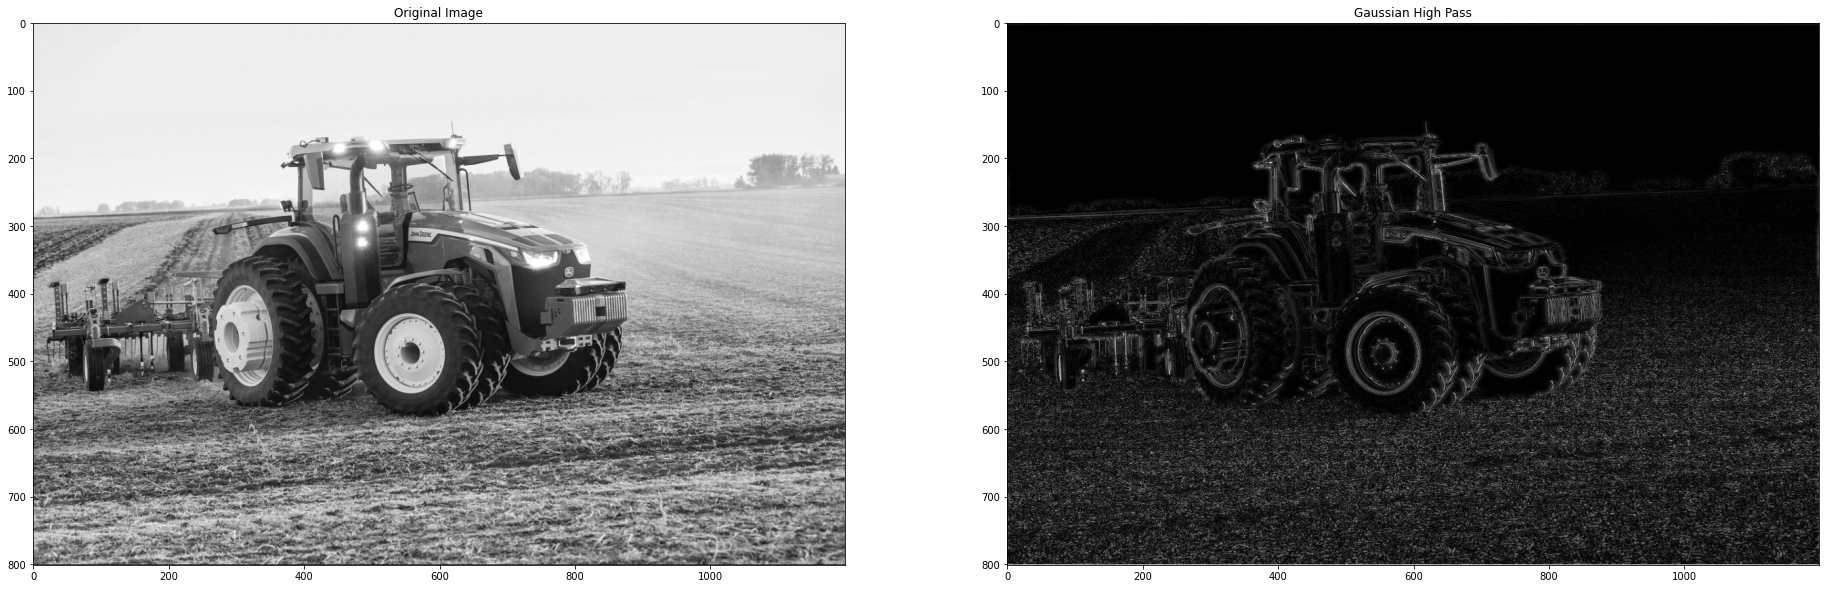

In [31]:
img = cv2.imread("/content/image.jpg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
plt.subplot(121), plt.imshow(img, "gray"), plt.title("Original Image")

HighPassCenter = center * gaussianHP(50,img.shape)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPassG = np.fft.ifft2(HighPass)
plt.subplot(122), plt.imshow(np.abs(inverse_HighPassG), "gray"), plt.title("Gaussian High Pass")
plt.show()

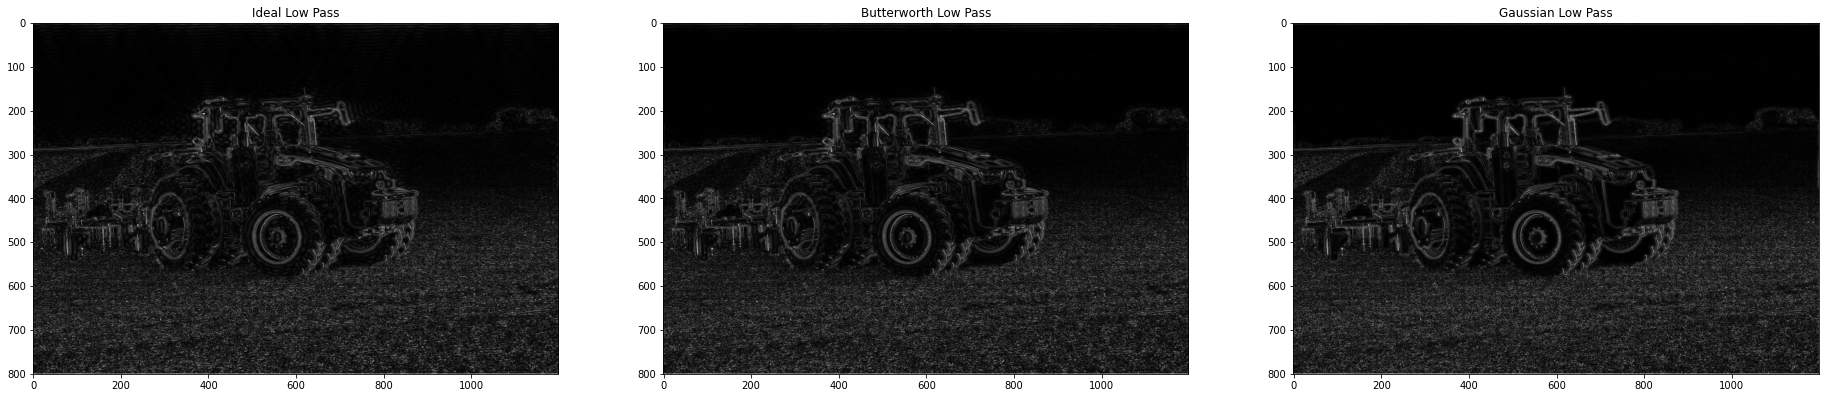

In [32]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
plt.subplot(131), plt.imshow(np.abs(inverse_HighPassI), "gray"), plt.title("Ideal Low Pass")
plt.subplot(132), plt.imshow(np.abs(inverse_HighPassB), "gray"), plt.title("Butterworth Low Pass")
plt.subplot(133), plt.imshow(np.abs(inverse_HighPassG), "gray"), plt.title("Gaussian Low Pass")
plt.show()

#### Discusión y comentarios finales:
* Continuando con el ejemplo anterior aplicamos igualmente los 3 filtros básicos (Ideal, Gaussian y Butterworth) para la imagen de un tractor, a través de estos filtros en combinación con el fitro pasa-altas se remueve el ruido de baja frecuencia de una imagen y mantiene el de alta frecuencia.
* Además se permite el enfoque en los puntos predominantes en el contorno de la imagen,  es decir la imagen procesada muestra los bordes del objeto predominante para determinar sus frecuencias altas. 
  * **Filtro de pasa altos Ideal**, se observa que al igual que son su filtro de pasa bajos, deja ver "ondas" que parecen ruido. En el tractor se percibe en las luces (de la parte superior de la cabina) donde aparecen ondas adicionales, cuando se debería de ver de un negro casi uniforme contra el cielo de fondo.
  * **Filtro de pasa altos Butterworth**, se siguen apreciando las ando alrededor del foco del tractor, pero en menor medida que con el filtro Ideal de pasa altos.
  * **Filtro de pasa altos Gaussiano**, casi no se perciben estas ondas, es decir, la transición de este filtro es mucho más suave que los otros 2 y se aprecia con fondos (en este caso el cielo) mucho más limpios.
* Igualmente se incluye tabla comparativa entre los 3 filtros, para poder observar sus funciones de transferencia, sus filtros y sus representaciones matemáticas:

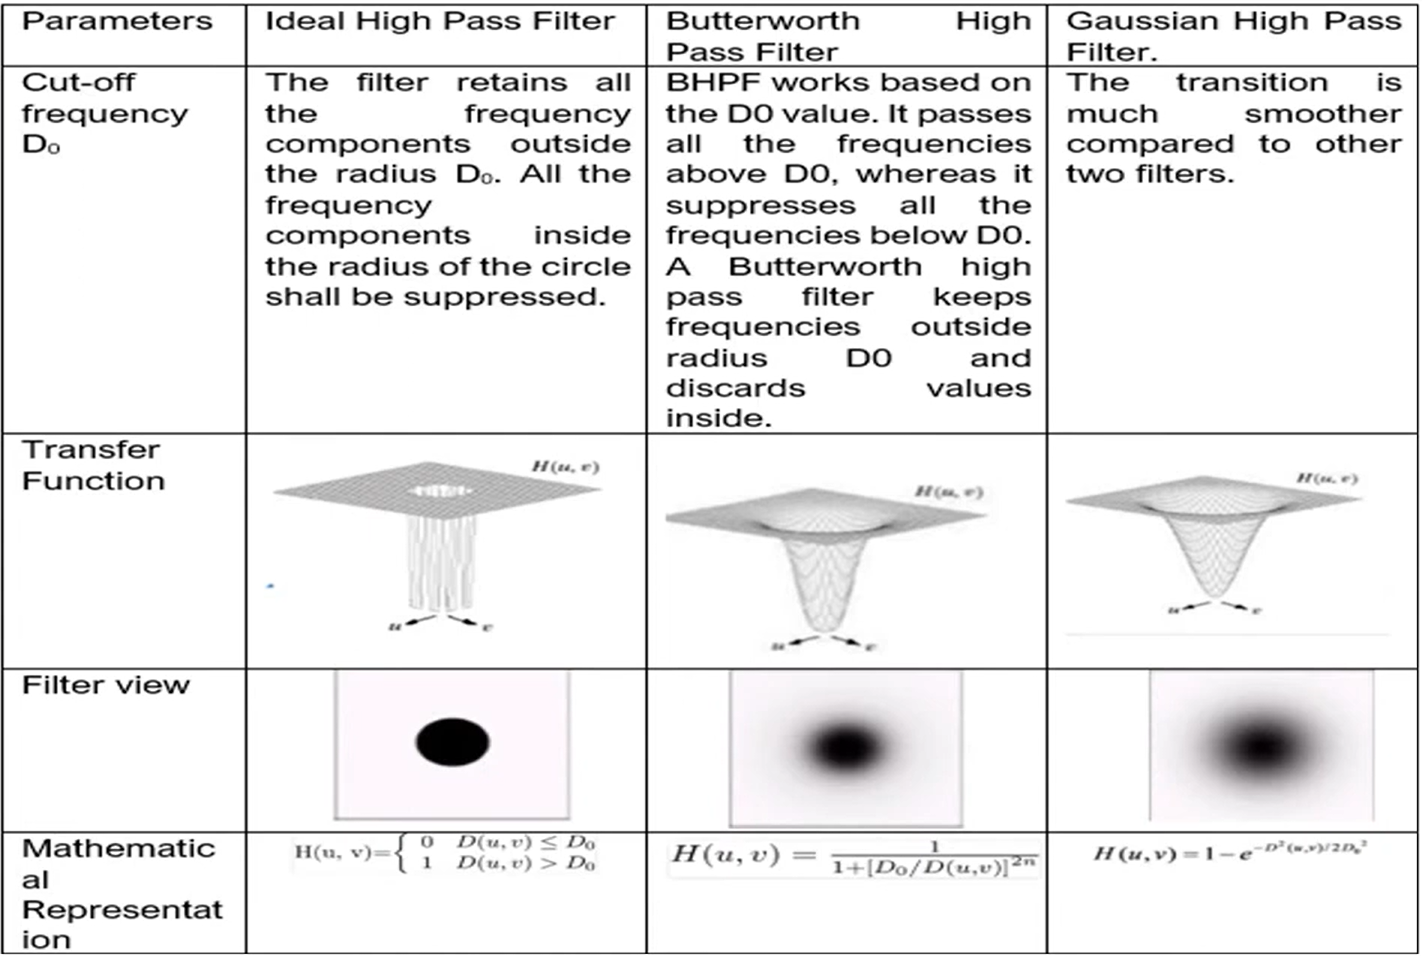

Fuente: [Video comparativo de filtros pasa altos Ideal, Butterworth y Gaussiano](https://www.youtube.com/watch?v=EbHHrS7PGtI&list=PL3uLubnzL2TkQ5ZpBIpX34t0cpggGMuIF&index=36)

## **Bibliografía:**
* Shriram Vasudevan. (2021, 22 abril). 26. Comparison of Ideal Low Pass Filter, Butterworth Low Pass Filter and Gaussian Low Pass Filter. YouTube. https://www.youtube.com/watch?v=MIDnZpKu8D8
* Shriram Vasudevan. (2021b, mayo 12). 29. Difference between Low Pass and High Pass filters,  High pass filters comparison. YouTube. https://www.youtube.com/watch?v=EbHHrS7PGtI
* TutorialsPoint. (2021a, julio 28). High Pass vs Low Pass Filters. https://www.tutorialspoint.com/dip/high_pass_vs_low_pass_filters.htm
* Nayak, J. & BITS Pilani, Dubai Campus. (2022). Digital Image Processing. universe.bits. Recuperado 12 de febrero de 2023, de https://universe.bits-pilani.ac.in/uploads/JNKDUBAI/ImageProcessing7-FrequencyFiltering.pdf